In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
buyer_final_df = pd.read_csv('/home/jovyan/travel-blog/buyer-final.csv', sep=';')
first_final_df = pd.read_csv('/home/jovyan/travel-blog/first-final.csv', sep=';')

In [51]:
buyer_final_df.dtypes


event_type     object
user_id         int64
price           int64
dateandtime    object
dtype: object

In [52]:
data.head(10)


,event_type;user_id;price;dateandtime
0,buy;2458151279;80;2018.01.05 10:23
1,buy;2458151279;8;2018.01.04 0:50
2,buy;2458151323;8;2018.01.10 2:09
3,buy;2458151349;8;2018.02.24 18:22
4,buy;2458151364;8;2018.01.22 8:09
5,buy;2458151367;8;2018.01.26 9:02
6,buy;2458151425;8;2018.02.25 22:19
7,buy;2458151468;8;2018.01.02 19:08
8,buy;2458151468;80;2018.01.02 18:09
9,buy;2458151481;80;2018.01.03 1:33


In [53]:
# Convert the 'dateandtime' column to datetime objects
buyer_final_df['dateandtime'] = pd.to_datetime(buyer_final_df['dateandtime'], format='%Y.%m.%d %H:%M')
first_final_df['dateandtime'] = pd.to_datetime(first_final_df['dateandtime'], format='%Y.%m.%d %H:%M')

In [54]:
buyer_final_df.dtypes

event_type             object
user_id                 int64
price                   int64
dateandtime    datetime64[ns]
dtype: object

In [55]:
# Group by 'user_id' and find the earliest visit for each user in the first visit data
first_visit_df = first_final_df.groupby('user_id').agg({'dateandtime': 'min'}).reset_index()
first_visit_df.rename(columns={'dateandtime': 'first_visit_time'}, inplace=True)

In [56]:
# Group by 'user_id' and find the earliest purchase for each user in the buyers data
first_purchase_df = buyer_final_df.groupby('user_id').agg({'dateandtime': 'min'}).reset_index()
first_purchase_df.rename(columns={'dateandtime': 'first_purchase_time'}, inplace=True)

In [57]:
# Merge the two datasets on 'user_id' to find the time to first purchase for each user
user_first_events_df = pd.merge(first_visit_df, first_purchase_df, on='user_id', how='inner')

In [58]:
# Calculate the number of days from the first visit to the first purchase for each user
user_first_events_df['days_to_first_purchase'] = (user_first_events_df['first_purchase_time'] - user_first_events_df['first_visit_time']).dt.days

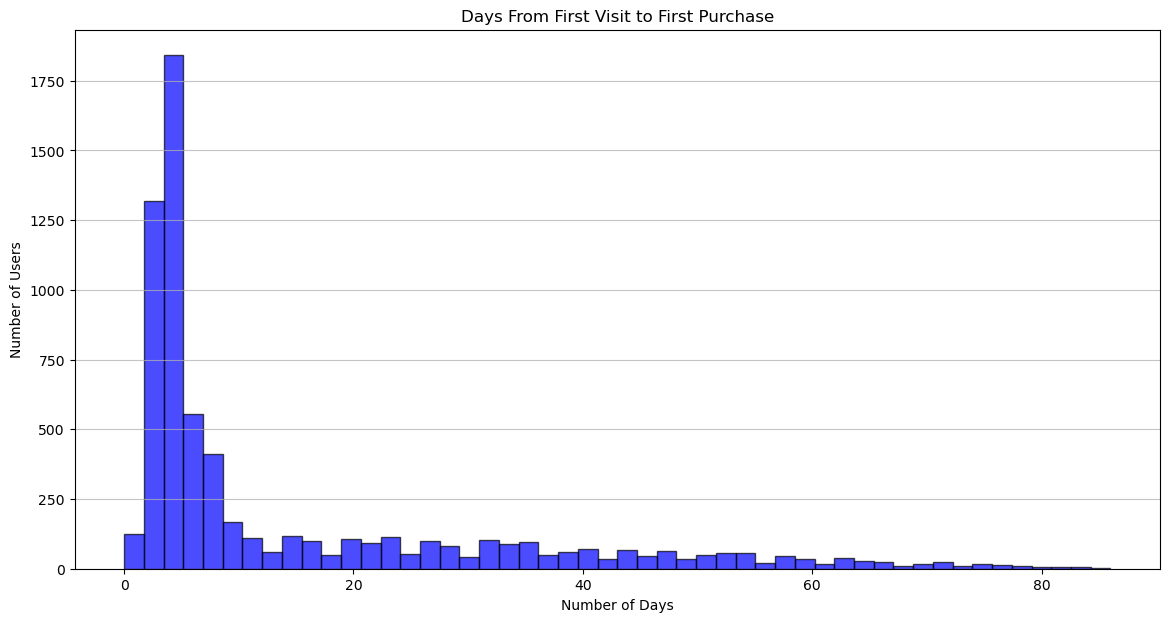

In [59]:
# Create a histogram to visualize the distribution of days to the first purchase
plt.figure(figsize=(14, 7))
plt.hist(user_first_events_df['days_to_first_purchase'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Days From First Visit to First Purchase')
plt.xlabel('Number of Days')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [63]:
average_days = user_first_events_df['days_to_first_purchase'].mean()
median_days = user_first_events_df['days_to_first_purchase'].median()

average_days, median_days

(14.777376654632972, 6.0)